# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

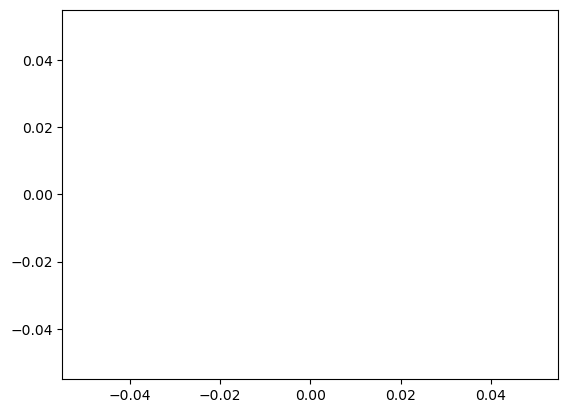

In [2]:
plt.plot()
plt.show()

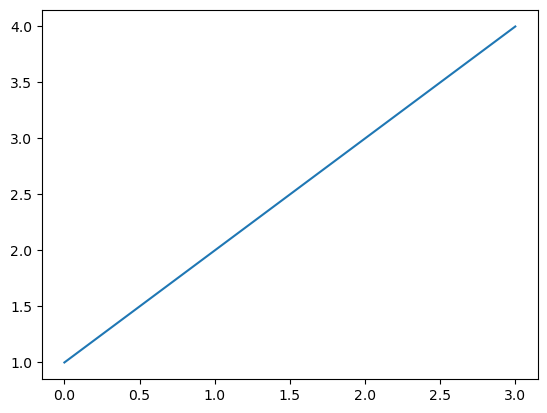

In [3]:
plt.plot([1,2,3,4])
plt.show()

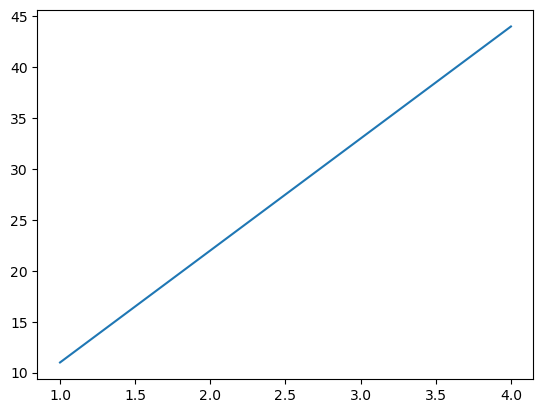

In [4]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)
plt.show()

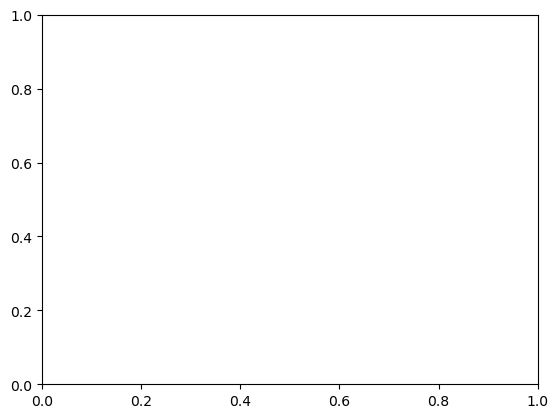

In [5]:
# 1st method

fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

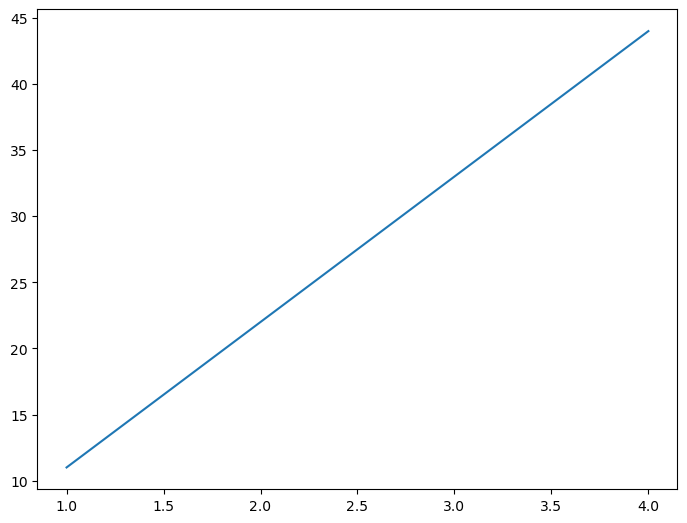

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

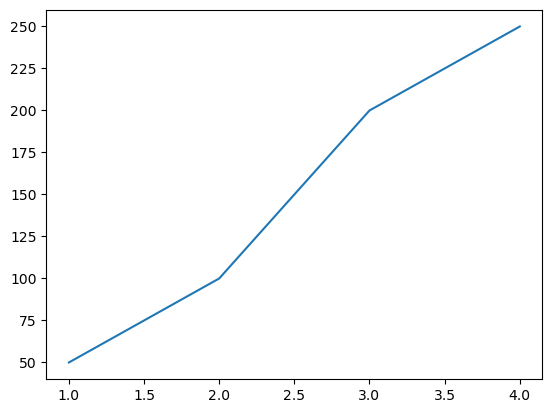

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

In [9]:
# 3rd method (recommended)

fig, ax = plt.subplots()
ax.plot(x,[50, 100, 200, 250])
plt.show()
type(fig), type(ax)

## Matplotlib example worklow

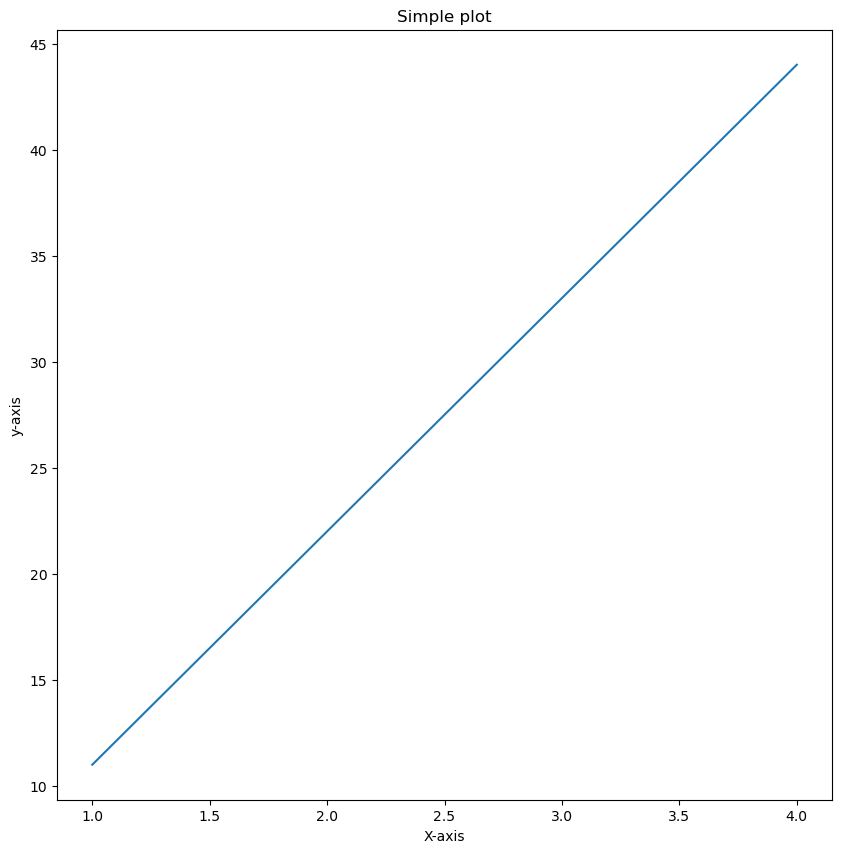

In [16]:
# 0. import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1. prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. setup plot
fig, ax = plt.subplots(figsize = (10, 10))

# 3. plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title = "Simple plot",
      xlabel = "X-axis",
      ylabel = "y-axis")

# 5. save and show (you save the whole figure)
fig.savefig("./sample-plot.png")
plt.show()

## 
making figures with NumPy arrays
we want:

    * Line plot
    * Scatter plot
    * Bar plot
    * Histogram
    * Subplot

In [17]:
import numpy as np

In [19]:
# create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

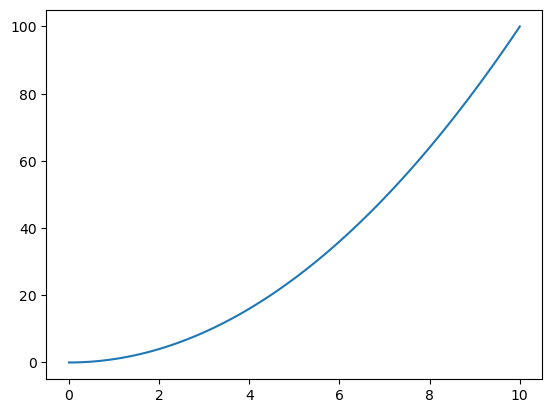

In [20]:
# plot the data 
fig, ax = plt.subplots()
ax.plot(x, x**2) # line plot
plt.show()

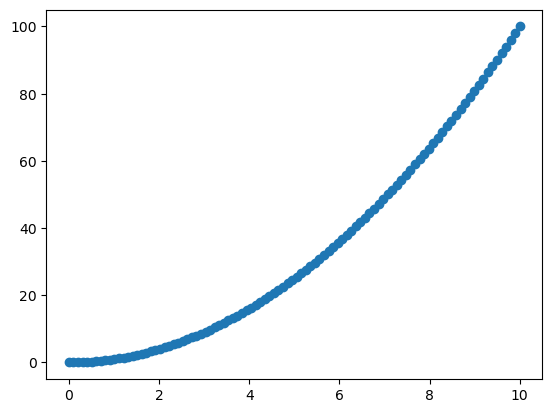

In [21]:
# use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, x**2)
plt.show()

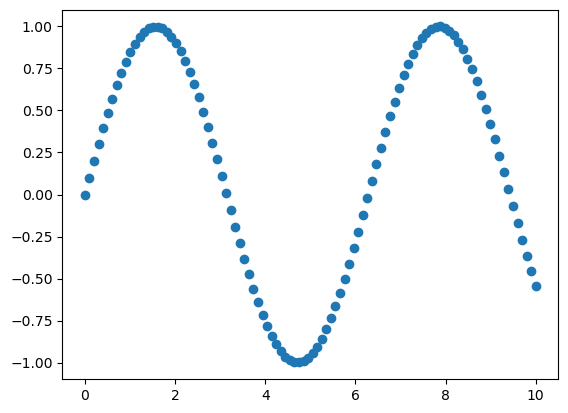

In [22]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))
plt.show()

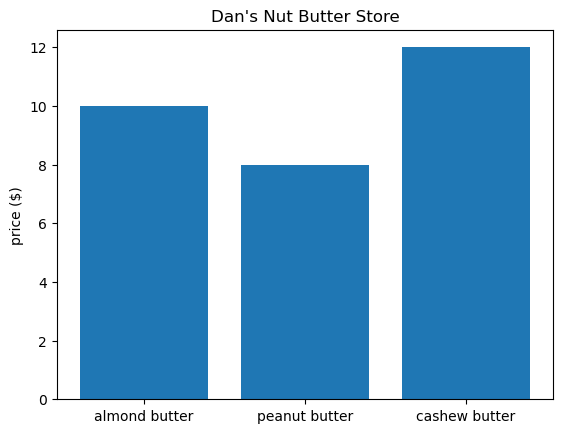

In [28]:
# make a plot from dictionary

nut_butter_prices ={
    "almond butter" : 10,
    "peanut butter" : 8,
    "cashew butter" : 12
 }

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(),  nut_butter_prices.values())
ax.set(
    title = "Dan's Nut Butter Store",
    ylabel = "price ($)"
)
plt.show()

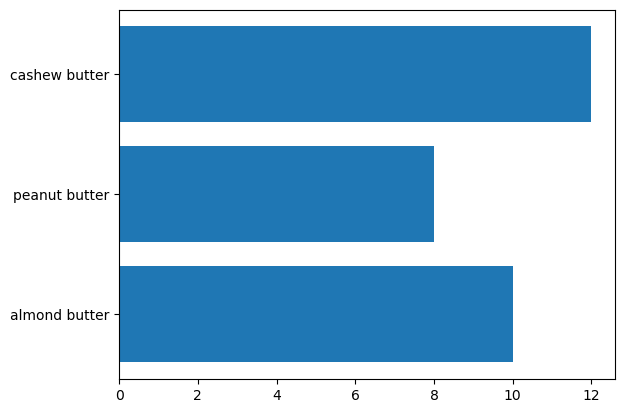

In [29]:
fig, ax = plt.subplots()
ax.barh(nut_butter_prices.keys(), nut_butter_prices.values())
plt.show()

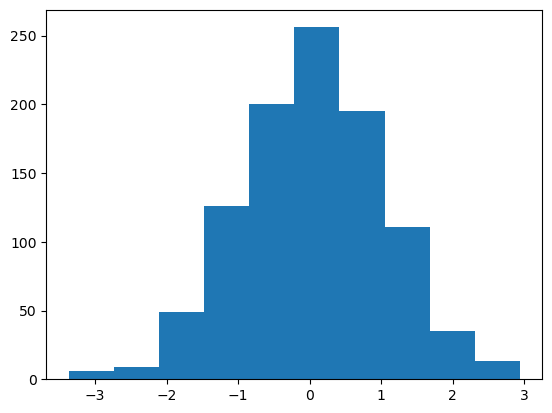

In [30]:
# Make some data for histogram
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)
plt.show()

## Two options for subplots

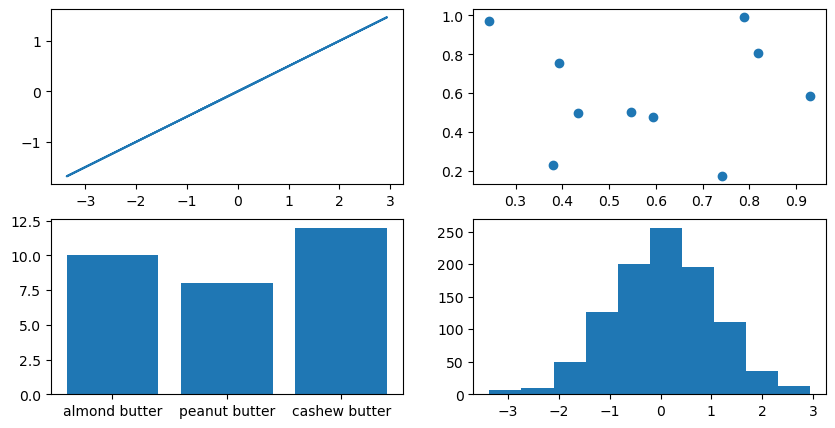

In [39]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize =(10,5)
)
# plot to each different axes
ax1.plot(x,x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(x)
plt.show()

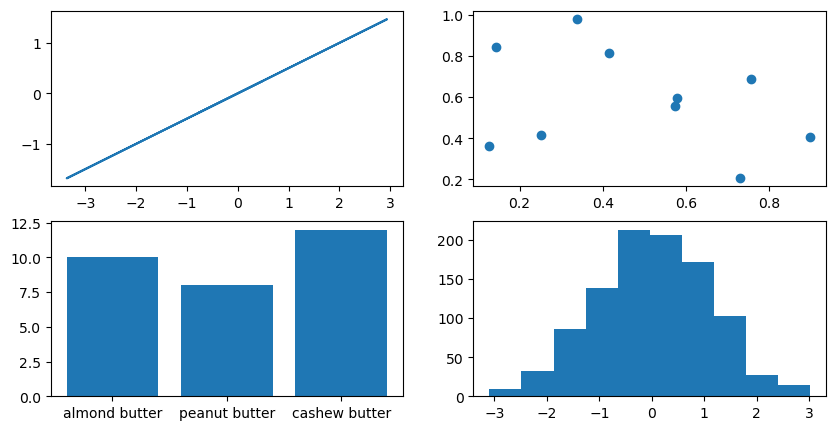

In [45]:
# Subplot option 2
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(10,5)
)

# plot to each different index
ax[0,0].plot(x, x/2)
ax[0,1].scatter(np.random.random(10), np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000))
plt.show()

### plotting from pandas dataframes

In [46]:
import pandas as pd


In [47]:
# make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [48]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("2/2/2025", periods = 1000))
ts

2025-02-02   -0.922522
2025-02-03    0.880543
2025-02-04   -0.719226
2025-02-05   -0.286547
2025-02-06    0.618661
                ...   
2027-10-25    1.095811
2027-10-26   -0.935978
2027-10-27   -1.333082
2027-10-28    0.442799
2027-10-29   -0.119523
Freq: D, Length: 1000, dtype: float64

In [49]:
ts = ts.cumsum()

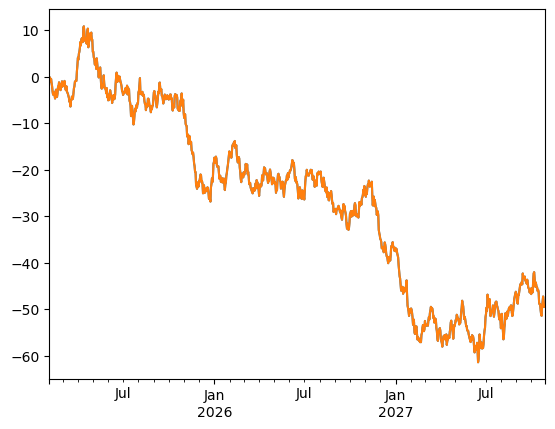

In [51]:
ts.plot()
plt.show()

In [52]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [66]:
car_sales["Price"] = car_sales["Price"].str.replace('r[\\$\\,\\.]',"", regex= True)

In [68]:
car_sales["Price"] = car_sales["Price"].str.replace(r'[\$,]', '', regex=True)  # Remove $ and ,
car_sales["Price"] = car_sales["Price"].str.replace(r'\.00$', '', regex=True)  # Remove .00 at the end, $ marks the end of the string, so it won't remove .00 if it appears in the middle.
# to remove last 2 zeros we can slice them off using car_sales.Price.str[:-2]
car_sales["Price"] = car_sales["Price"].astype(int)  # Convert to integer

In [69]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [73]:
car_sales["Sale Date"] = pd.date_range("1/1/2025", periods = len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


In [74]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


In [76]:
# let's plot the car sales
car_sales.plot(x="Sale Date", y = "Total Sales")

<Axes: xlabel='Sale Date'>

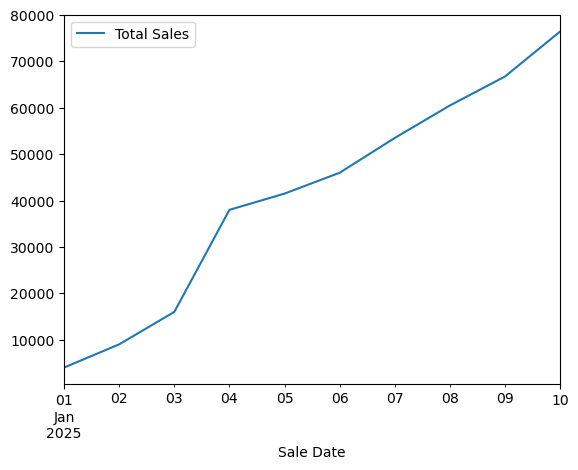

In [77]:
plt.show()

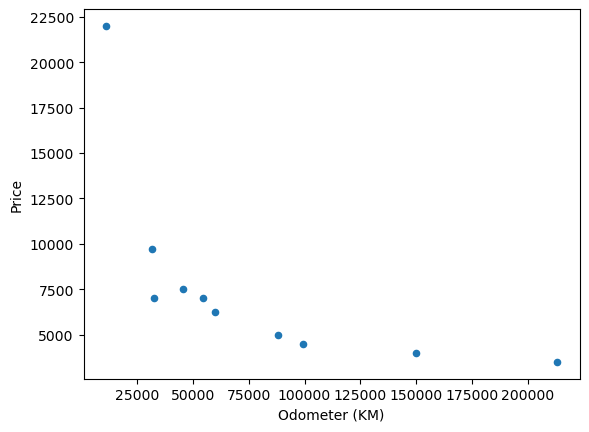

In [78]:
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = "scatter")
plt.show()

In [79]:
# how about a bar graph?
x  = np.random.rand(10, 4)
x

# turn it into a dataframe
df = pd.DataFrame(x, columns = ['a', 'b' , 'c', 'd'])
df

,a,b,c,d
0,0.233766,0.120361,0.531300,0.056747
1,0.940190,0.568988,0.312859,0.669270
2,0.710661,0.737877,0.281451,0.080028
3,0.146035,0.468266,0.832889,0.891275
4,0.950010,0.163171,0.279107,0.333456
5,0.150689,0.582918,0.605127,0.398533
6,0.843412,0.563293,0.372072,0.550170
7,0.820538,0.670250,0.897805,0.391178
8,0.306881,0.160244,0.016049,0.861027
9,0.876661,0.035495,0.519330,0.583066


In [86]:
df.plot.bar();

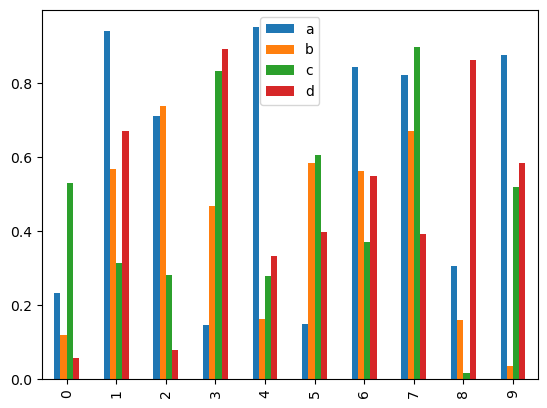

In [87]:
plt.show()

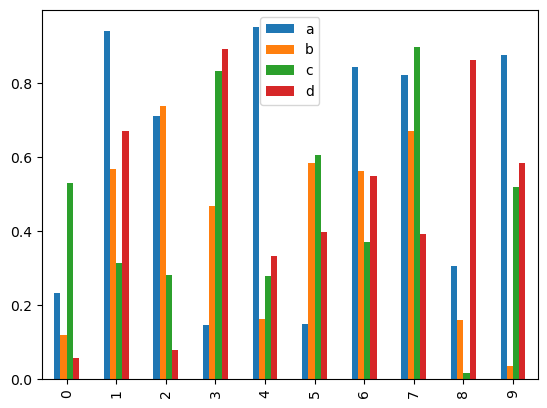

In [88]:
df.plot(kind = "bar")
plt.show()

In [89]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


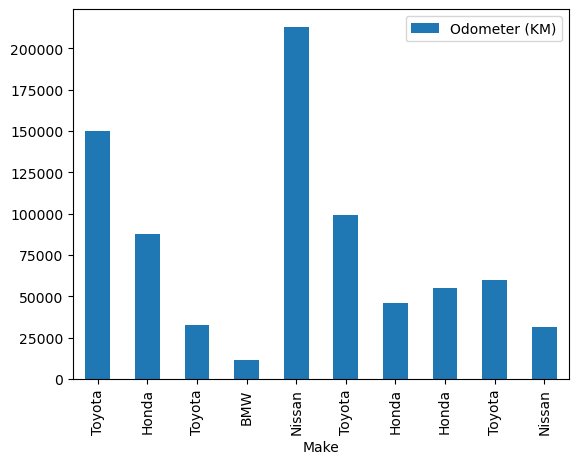

In [94]:
car_sales.plot(x="Make", y = "Odometer (KM)",kind = "bar")
plt.show()

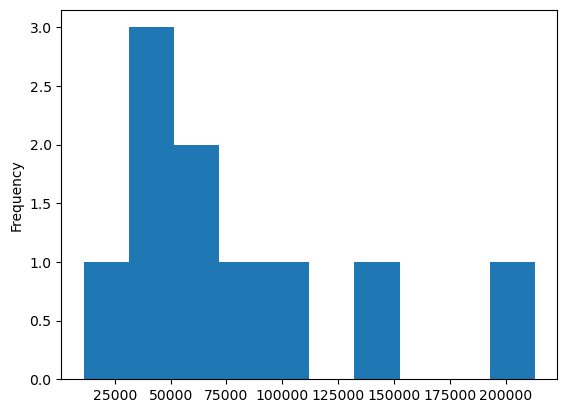

In [95]:
# how about histogram?
car_sales["Odometer (KM)"].plot.hist()
plt.show()

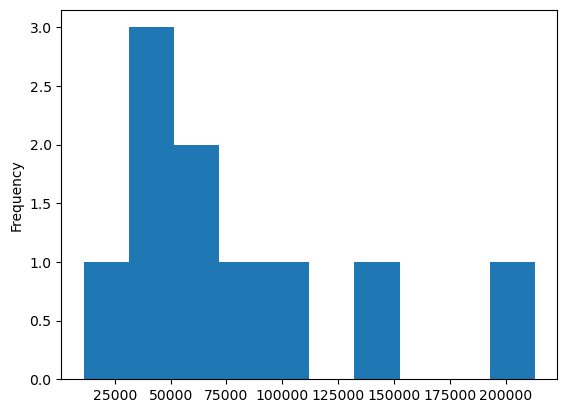

In [99]:
car_sales["Odometer (KM)"].plot.hist(bins = 10)
plt.show()

In [100]:
# let's try on another dataset

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [101]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


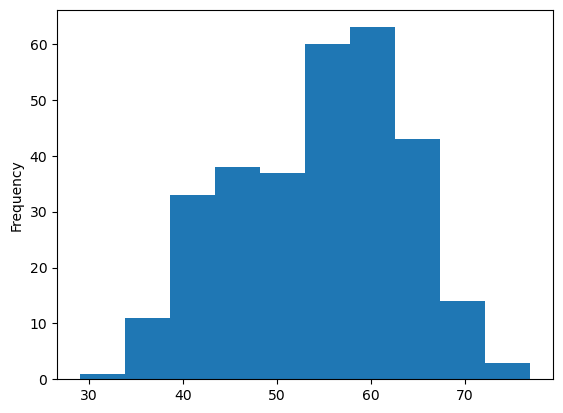

In [102]:
# create a histogram of age
heart_disease["age"].plot.hist()
plt.show()

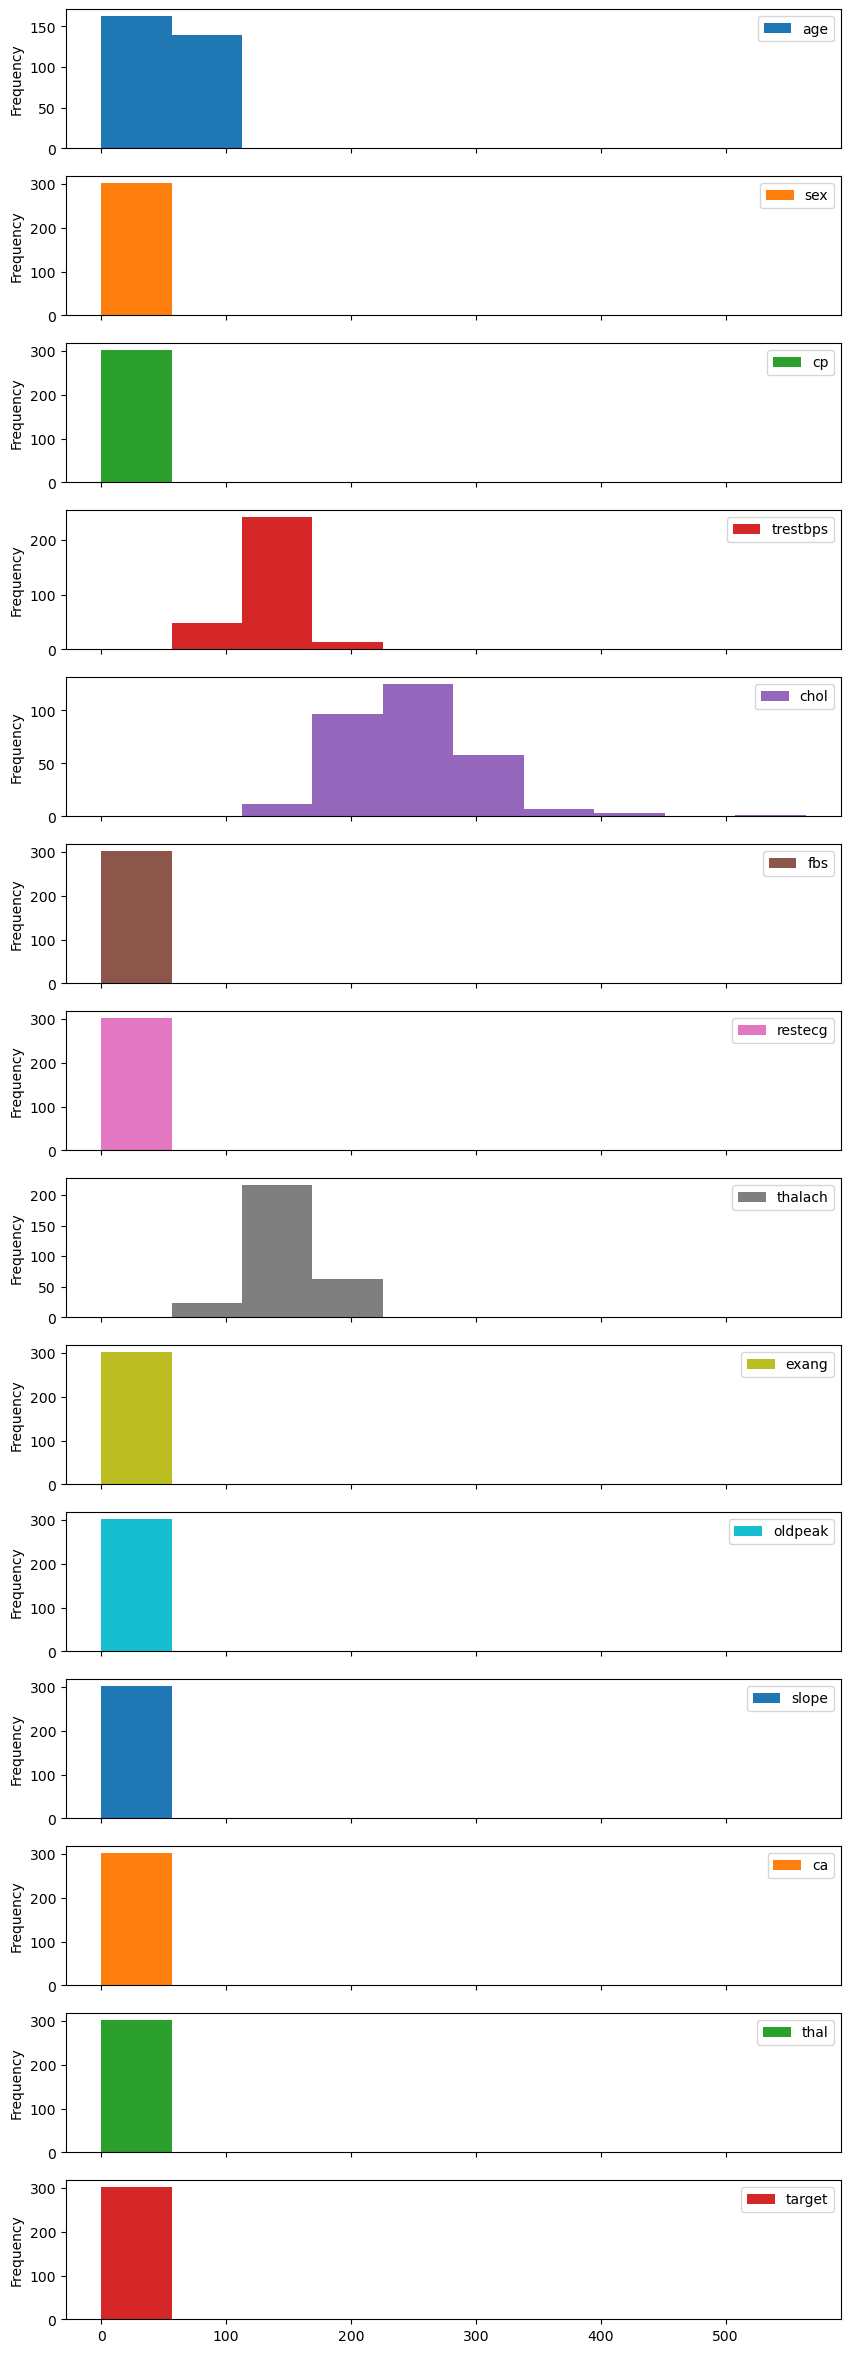

In [105]:
heart_disease.plot.hist(subplots = True, figsize = (10, 30))
plt.show()

In [106]:
! git add .

In [107]:
!git add .

In [108]:
!git config --global core.autocrlf true
